In [2]:
import pandas as pd
from pandas import Series, DataFrame

titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:


# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

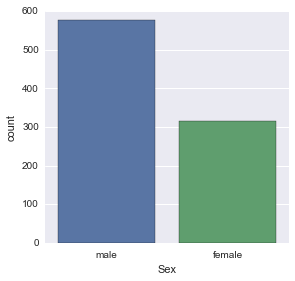

In [5]:
#plot that shows ratio of men to women on board
sns.factorplot('Sex',data=titanic_df, kind = "count")

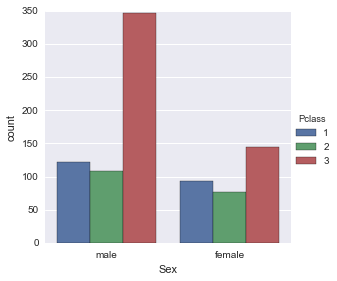

In [6]:
#plot that shows ratio of men to women on board and their respective classes
#since we are using the a count plot we must specify the order (default is descending count)
class_list = titanic_df.Pclass
pclass = list(set(class_list))

sns.factorplot('Sex', hue = 'Pclass', hue_order = pclass, data = titanic_df, kind = "count")

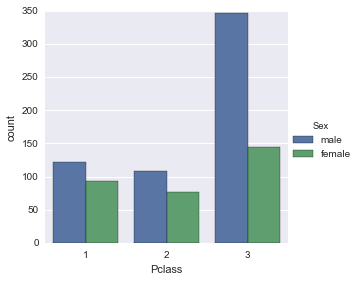

In [7]:
#alternative view of previous plot; I think this one is easier to visually interpret
sns.factorplot('Pclass', hue = 'Sex', data = titanic_df, kind = "count", order = pclass)

In [8]:
def male_female_child(passenger):
    age, sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [9]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C,male
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q,male


In [10]:
list(titanic_df.person).count('child')

83

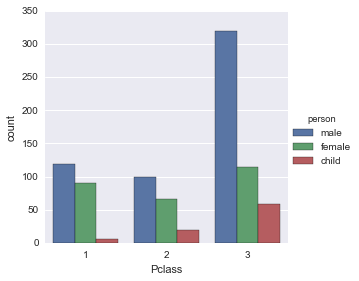

In [11]:
sns.factorplot('Pclass', data = titanic_df, hue = 'person', kind = 'count', order = pclass)

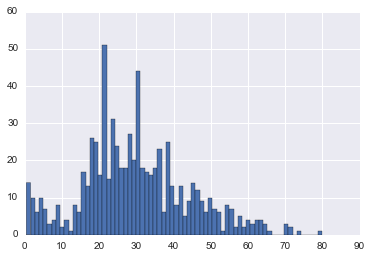

In [12]:
#show the distribution of ages
titanic_df['Age'].hist(bins=70)

In [13]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

In [14]:
titanic_df['person'].value_counts(normalize = True)

male      0.602694
female    0.304153
child     0.093154
dtype: float64

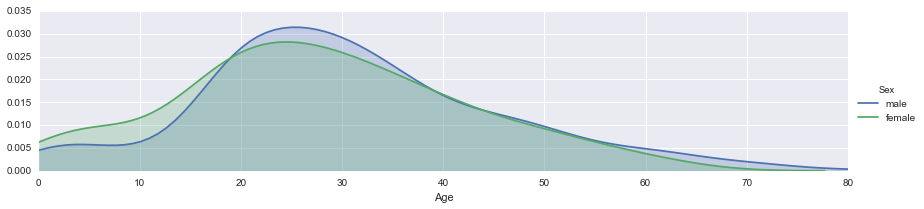

In [15]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df.Age.max()
fig.set(xlim = (0,oldest))
fig.add_legend()

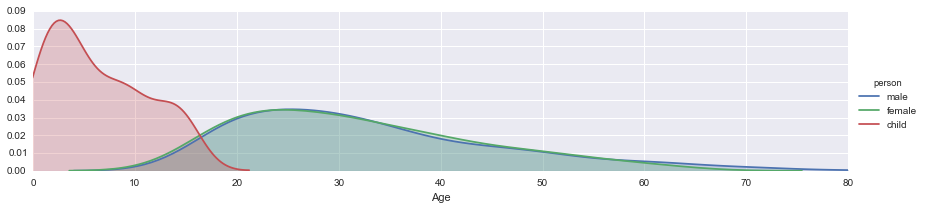

In [16]:
fig = sns.FacetGrid(titanic_df, hue = "person", aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.set(xlim = (0, oldest))
fig.add_legend()

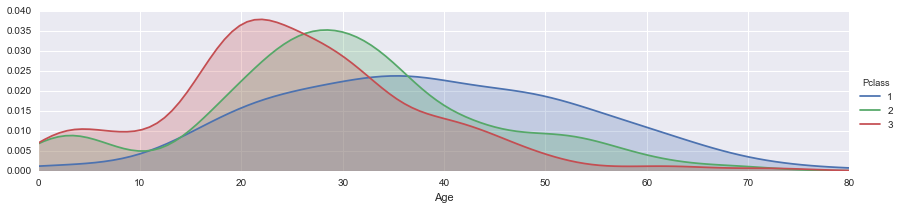

In [17]:
fig = sns.FacetGrid(titanic_df, hue = "Pclass", aspect = 4, hue_order = pclass)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.set(xlim = (0, oldest))
fig.add_legend()

In [18]:
#we will now explore the passengers class and cabins
#we first must drop NaN values
deck = titanic_df['Cabin'].dropna()

In [19]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [20]:
levels = []

for level in deck:
  levels.append(level[0])



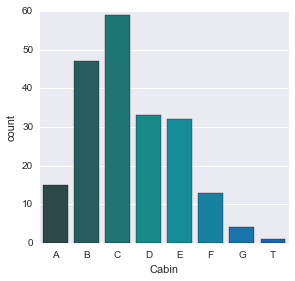

In [21]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin = sorted(list(set(cabin_df.Cabin)))
sns.factorplot('Cabin', data= cabin_df, kind = 'count', order = cabin, palette = "winter_d")

In [22]:
classes = titanic_df.Pclass[deck.index]

In [23]:
cabin_df["Pclass"] = classes.values
class_list2 = cabin_df.Pclass
pclass2 = list(set(class_list2))
pclass2

[1, 2, 3]

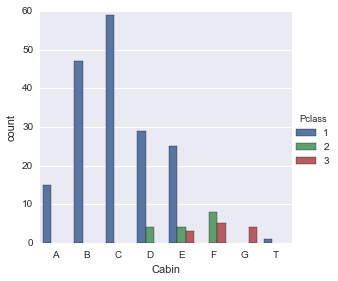

In [24]:
sns.factorplot('Cabin', hue = "Pclass", data= cabin_df, kind = 'count', order = cabin, hue_order = pclass2)

In [28]:
cabin_df.Cabin = cabin_df[cabin_df.Cabin != 'T']

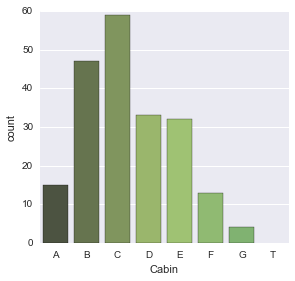

In [35]:
sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'summer_d', order = cabin )

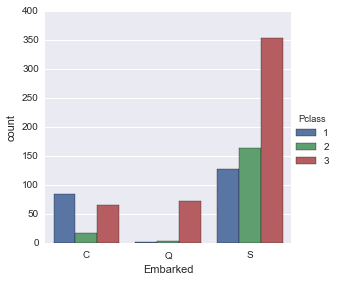

In [48]:
# The column 'Embarked' can take on 3 possible values, C,Q, or S for Cherbourg, Queenstown, Southhampton
sns.factorplot('Embarked', data = titanic_df, hue = 'Pclass', kind = 'count', order = ['C', 'Q', 'S'] , hue_order = [1, 2, 3])

In [51]:
#now we will find out who was traveling alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [52]:
titanic_df.Alone = titanic_df.Alone.map(lambda x: 'With Family' if x > 0 else 'Alone')

In [53]:
titanic_df.Alone.head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

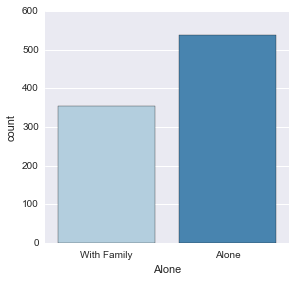

In [56]:
sns.factorplot('Alone', data = titanic_df, kind = 'count', palette = 'Blues')

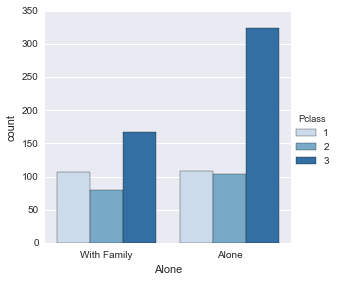

In [59]:
sns.factorplot('Alone', hue = 'Pclass', hue_order = [1, 2, 3], data = titanic_df, kind = 'count', palette = 'Blues')

In [61]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

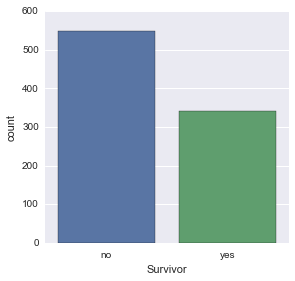

In [64]:
sns.factorplot('Survivor', kind = 'count', data = titanic_df)

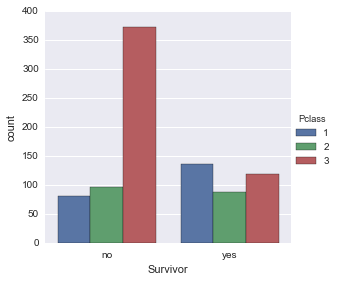

In [65]:
sns.factorplot('Survivor', hue = 'Pclass', hue_order = pclass, kind = 'count', data = titanic_df)

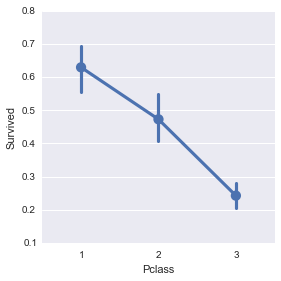

In [73]:
sns.factorplot('Pclass','Survived', data = titanic_df, x_order = [1, 2, 3])

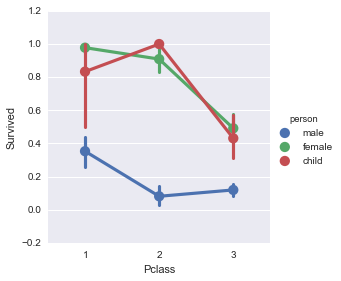

In [75]:
sns.factorplot('Pclass', 'Survived', hue='person', x_order = [1, 2, 3], data=titanic_df, type = 'Count')

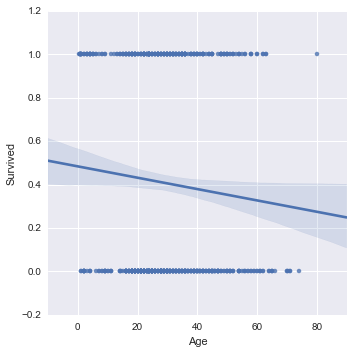

In [77]:
sns.lmplot('Age','Survived',data=titanic_df)

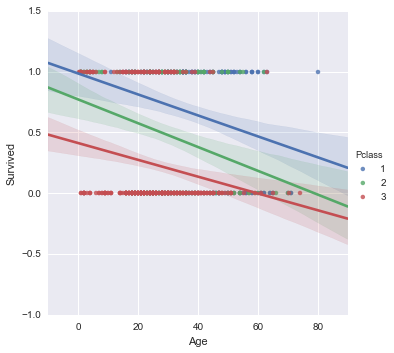

In [79]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', hue_order = [1, 2, 3], data = titanic_df)

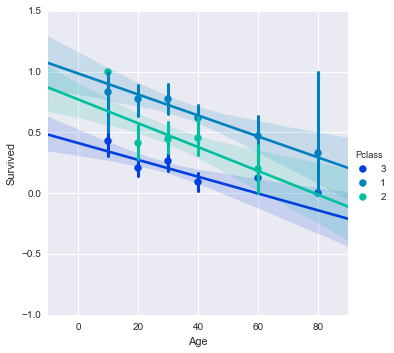

In [81]:
generations = [10, 20, 30, 40, 60, 80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, x_bins = generations, palette = 'winter')

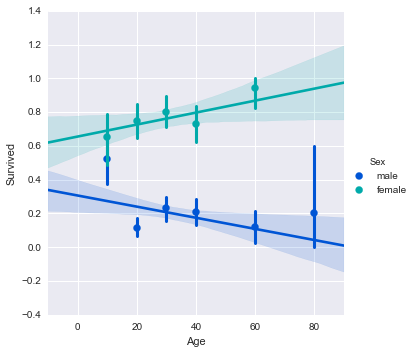

In [82]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [83]:
survived = titanic_df.Survived[deck.index]

In [86]:
cabin_df["Survived"] = survived
cabin_df.head()

,Cabin,Pclass,survived,Survived
0,C,1,NaN,NaN
1,C,1,1,1
2,E,1,NaN,NaN
3,G,3,1,1
4,C,1,NaN,NaN


In [93]:
survivor = titanic_df.Survivor[deck.index]
cabin_df['Survivor'] = survivor
cabin_df.head()

,Cabin,Pclass,survived,Survived,Survivor
0,C,1,NaN,NaN,NaN
1,C,1,1,1,yes
2,E,1,NaN,NaN,NaN
3,G,3,1,1,yes
4,C,1,NaN,NaN,NaN


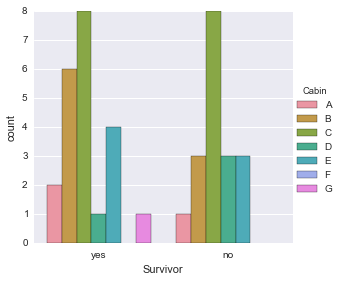

In [96]:
sns.factorplot('Survivor', hue = 'Cabin', x_order = ['yes', 'no'], hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data = cabin_df, kind = 'count')